Aluno: Nelson de Campos Nolasco.

Disciplina: Deep Learning.

Professor: Rafael Glater

<center><h1>Dataset Titanic</h1></center>

<center>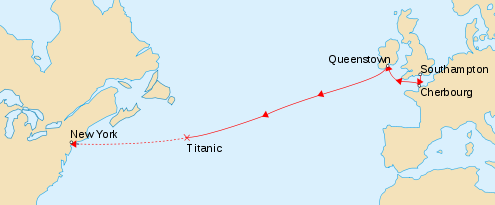</center>

In [1]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sobre os dados

<table>
<tbody>
<tr><th><b>Coluna</b></th><th><b>Descrição</b></th><th><b>Valores</b></th></tr>
<tr>
<td>survival</td>
<td>Sobreviveu?</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Classe</td>
<td>1 = 1ª classe, 2 = 2ª classe, 3 = 3ª classe</td>
</tr>
<tr>
<td>sex</td>
<td>Sexo</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Idade em anos</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td>Nº de irmãos / cônjuges a bordo do Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td>Nº de pais / filhos a bordo do Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Número do ticket</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Tarifa</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Número da cabine</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Portão de embarque</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

# Lendo os dados

Envie os dados de treino e teste para o colab.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving test-labeled.csv to test-labeled.csv
Saving train.csv to train.csv


In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test-labeled.csv')

# Tratando os dados

Vamos juntar treino e teste em um único dataset pra gente ter uma visão geral de todo o dado e também ser capaz de fazer as normalizações e alterações necessárias trabalhando com um dataframe só.

Pra não perder a referência de qual registro era do treino qual era do teste, vamos criar uma coluna chamada "split" que armazenará de qual conjunto veio aquele dado.

In [5]:
train['split'] = 'train'
test['split'] = 'test'
df = pd.concat([train, test], axis=0, sort=True)

In [6]:
df

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,split
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,train
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,train
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,train
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,train
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,0,A.5. 3236,test
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,1,PC 17758,test
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,0,SOTON/O.Q. 3101262,test
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,0,359309,test


In [7]:
df['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

# Valores nulos

Vamos contar, para cada coluna, a quantidade de registros com valores nulos.

In [8]:
len(df) - df.count()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived          0
Ticket            0
split             0
dtype: int64

# Titulação

### Extraindo a titulação:

In [9]:
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=True)

In [10]:
df['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Ms            2
Major         2
Mlle          2
Capt          1
Don           1
Dona          1
Countess      1
Mme           1
Jonkheer      1
Lady          1
Sir           1
Name: Title, dtype: int64

### Agrupando a titulação

In [11]:
# replacing some titles with more common ones
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr',
           'Don': 'Mr', 'Mme': 'Mrs', 'Jonkheer': 'Mr', 'Lady': 'Mrs',
           'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
df.replace({'Title': mapping}, inplace=True)

In [12]:
df['Title'].value_counts()

Mr        767
Miss      264
Mrs       201
Master     61
Rev         8
Dr          8
Name: Title, dtype: int64

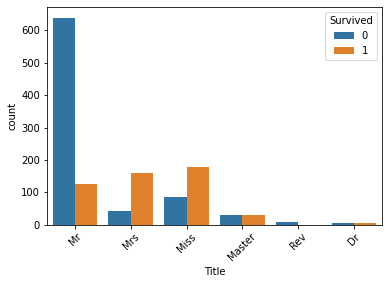

In [13]:
sns.countplot(x='Title', data=df, hue='Survived')
plt.xticks(rotation=45)
plt.show()

# Idade média por titulação

In [14]:
# computa a média de idade por titulação
title_ages = dict(df.groupby('Title')['Age'].median())

# cria uma coluna com a idade média
df['age_med'] = df['Title'].apply(lambda x: title_ages[x])

# substitui as idades nulas pelo valor da média
df['Age'].fillna(df['age_med'], inplace=True, )

# deleta a coluna
del df['age_med']

# Tarifas por classe

In [15]:
# computa a tarifa média por classe
class_fares = dict(df.groupby('Pclass')['Fare'].median())

# cria a coluna com a tarifa média
df['fare_med'] = df['Pclass'].apply(lambda x: class_fares[x])

# substitui os valores nulos pelo valor médio
df['Fare'].fillna(df['fare_med'], inplace=True, )
del df['fare_med']

# Portão de embarque

In [16]:
df['Embarked'].fillna(method='backfill', inplace=True)

# Conferindo os valores nulos

In [17]:
len(df) - df.count()

Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived          0
Ticket            0
split             0
Title             0
dtype: int64

# Corelação com a sobrevivência

Vamos analisar quais características são um bom indício para prever a sobrevivência de um passageiro

### Sexo

In [18]:
# df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).agg(['count', 'sum', 'mean'])

Survived               
          count  sum      mean
Sex                           
female      466  339  0.727468
male        843  161  0.190985

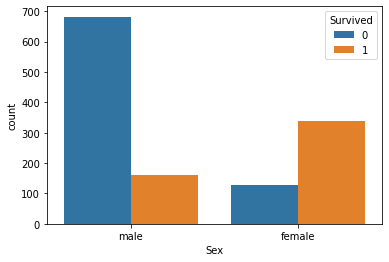

In [19]:
sns.countplot(x='Sex', data=df, hue='Survived')
plt.show()

### Classe

In [20]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.619195
1,2,0.429603
2,3,0.255289


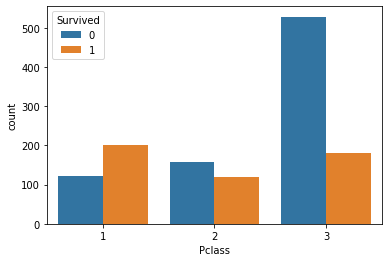

In [21]:
ax = sns.countplot(x='Pclass', data=df, hue='Survived')
plt.show()

### Nº de irmãos / cônjuge

In [22]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.510972
2,2,0.452381
0,0,0.346801
3,3,0.300000
4,4,0.136364
5,5,0.000000
6,8,0.000000


### Nº de pais e filhos

In [23]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.625000
1,1,0.588235
2,2,0.504425
0,0,0.335329
4,4,0.166667
5,5,0.166667
6,6,0.000000
7,9,0.000000


### Sobrevivência por titulação

In [24]:
df[["Title", "Survived"]].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
4,Mrs,0.791045
2,Miss,0.678030
1,Master,0.508197
0,Dr,0.500000
3,Mr,0.165580
5,Rev,0.000000


# Família

In [25]:
df['Family_Size'] = df['Parch'] + df['SibSp']

# Normalização dos dados

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
continuous = ['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Family_Size']

scaler = StandardScaler()

for var in continuous:
    df[var] = df[var].astype('float64')
    df[var] = scaler.fit_transform(df[var].values.reshape(-1, 1))
   
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,split,Title,Family_Size
0,-0.574635,NaN,S,-0.095432,"Braund, Mr. Owen Harris",-0.445,1,0.841916,male,0.481288,0,A/5 21171,train,Mr,0.073352
1,0.641140,C85,C,-0.091836,"Cumings, Mrs. John Bradley (Florence Briggs Th...",-0.445,2,-1.546098,female,0.481288,1,PC 17599,train,Mrs,0.073352
2,-0.270692,NaN,S,-0.095395,"Heikkinen, Miss. Laina",-0.445,3,0.841916,female,-0.479087,1,STON/O2. 3101282,train,Miss,-0.558346
3,0.413182,C123,S,-0.092857,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",-0.445,4,-1.546098,female,0.481288,1,113803,train,Mrs,0.073352
4,0.413182,NaN,S,-0.095388,"Allen, Mr. William Henry",-0.445,5,0.841916,male,-0.479087,0,373450,train,Mr,-0.558346


# Convertendo dados categóricos para int

In [28]:
df.Embarked = pd.Categorical(df.Embarked)
df.Sex = pd.Categorical(df.Sex)
df.Title = pd.Categorical(df.Title)

df['Embarked'] = df.Embarked.cat.codes
df['Sex'] = df.Sex.cat.codes
df['Title'] = df.Title.cat.codes

In [29]:
df

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,split,Title,Family_Size
0,-0.574635,NaN,2,-0.095432,"Braund, Mr. Owen Harris",-0.445000,1,0.841916,1,0.481288,0,A/5 21171,train,3,0.073352
1,0.641140,C85,0,-0.091836,"Cumings, Mrs. John Bradley (Florence Briggs Th...",-0.445000,2,-1.546098,0,0.481288,1,PC 17599,train,4,0.073352
2,-0.270692,NaN,2,-0.095395,"Heikkinen, Miss. Laina",-0.445000,3,0.841916,0,-0.479087,1,STON/O2. 3101282,train,2,-0.558346
3,0.413182,C123,2,-0.092857,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",-0.445000,4,-1.546098,0,0.481288,1,113803,train,4,0.073352
4,0.413182,NaN,2,-0.095388,"Allen, Mr. William Henry",-0.445000,5,0.841916,1,-0.479087,0,373450,train,3,-0.558346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.033252,NaN,2,-0.095388,"Spector, Mr. Woolf",-0.445000,1305,0.841916,1,-0.479087,0,A.5. 3236,test,3,-0.558346
414,0.717126,C105,0,-0.089723,"Oliva y Ocana, Dona. Fermina",-0.445000,1306,-1.546098,0,-0.479087,1,PC 17758,test,4,-0.558346
415,0.679133,NaN,2,-0.095432,"Saether, Mr. Simon Sivertsen",-0.445000,1307,0.841916,1,-0.479087,0,SOTON/O.Q. 3101262,test,3,-0.558346
416,0.033252,NaN,2,-0.095388,"Ware, Mr. Frederick",-0.445000,1308,0.841916,1,-0.479087,0,359309,test,3,-0.558346


# Separando em treino e teste novamente

In [32]:
x_train = df[df['split'] == 'train']
y_train = x_train['Survived']
x_test = df[df['split'] == 'test']
y_test = x_test['Survived']

# Removendo colunas que não usaremos

In [ ]:
x_train.drop(['Cabin', 'Name', 'Ticket', 'PassengerId', 'split', 'Survived'], axis=1, inplace=True)
x_test.drop(['Cabin', 'Name', 'Ticket', 'PassengerId', 'split', 'Survived'], axis=1, inplace=True)

In [34]:
x_train

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Title,Family_Size
0,-0.574635,2,-0.095432,-0.445000,0.841916,1,0.481288,3,0.073352
1,0.641140,0,-0.091836,-0.445000,-1.546098,0,0.481288,4,0.073352
2,-0.270692,2,-0.095395,-0.445000,0.841916,0,-0.479087,2,-0.558346
3,0.413182,2,-0.092857,-0.445000,-1.546098,0,0.481288,4,0.073352
4,0.413182,2,-0.095388,-0.445000,0.841916,1,-0.479087,3,-0.558346
...,...,...,...,...,...,...,...,...,...
886,-0.194706,2,-0.095110,-0.445000,-0.352091,1,-0.479087,5,-0.558346
887,-0.802593,2,-0.094155,-0.445000,-1.546098,0,-0.479087,2,-0.558346
888,-0.574635,2,-0.094523,1.866526,0.841916,0,0.481288,2,1.336749
889,-0.270692,0,-0.094155,-0.445000,-1.546098,1,-0.479087,3,-0.558346


In [35]:
x_train.dtypes

Age            float64
Embarked          int8
Fare           float64
Parch          float64
Pclass         float64
Sex               int8
SibSp          float64
Title             int8
Family_Size    float64
dtype: object

# Criando a rede

In [36]:
# # Usando a API padrão
# input_layer = tf.keras.layers.Input(9)
# hidden_layer1 = tf.keras.layers.Dense(50, activation='relu')(input_layer)
# output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(hidden_layer1)
# model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')


# Usando a API sequencial
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(50, activation='relu', input_shape=(9,)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

# Treinando

In [37]:
model.fit(x_train, y_train, epochs=30, batch_size=10)

Epoch 1/30
90/90 [==============================] - 0s 3ms/step - loss: 0.6228 - accuracy: 0.6532
Epoch 2/30
90/90 [==============================] - 0s 3ms/step - loss: 0.5370 - accuracy: 0.7643
Epoch 3/30
90/90 [==============================] - 0s 3ms/step - loss: 0.4926 - accuracy: 0.7935
Epoch 4/30
90/90 [==============================] - 0s 3ms/step - loss: 0.4588 - accuracy: 0.8047
Epoch 5/30
90/90 [==============================] - 0s 3ms/step - loss: 0.4413 - accuracy: 0.8159
Epoch 6/30
90/90 [==============================] - 0s 3ms/step - loss: 0.4299 - accuracy: 0.8260
Epoch 7/30
90/90 [==============================] - 0s 3ms/step - loss: 0.4210 - accuracy: 0.8249
Epoch 8/30
90/90 [==============================] - 0s 3ms/step - loss: 0.4199 - accuracy: 0.8182
Epoch 9/30
90/90 [==============================] - 0s 3ms/step - loss: 0.4139 - accuracy: 0.8328
Epoch 10/30
90/90 [==============================] - 0s 3ms/step - loss: 0.4108 - accuracy: 0.8283
Epoch 11/30
90/90 [

In [38]:
model.evaluate(x_test, y_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.5276 - accuracy: 0.7703


[0.5275993347167969, 0.7703348994255066]